`63070501061 S.RAKNA`

> 20 points. 2 hours.

# MLPClassifier for MNIST data
Follow the instructions in the following site for `MLPClassifier` for *MNIST* data.

https://towardsdatascience.com/classifying-handwritten-digits-using-a-multilayer-perceptron-classifier-mlp-bc8453655880

- Use 50,000 data samples for training and 20,000 for testing. 
- Note you should scale your data to be 0-1 by dividing it by 255. 
- Report your accuracy and print out the confusion matrix.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.neural_network import MLPClassifier

mnist = arff.loadarff('./mnist_784.arff')
# Data available at https://www.openml.org/search?type=data&status=active&id=554

# or use the following code to download the data, uncomment the code below
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

#### Data import and preparation

In [2]:
# convert to pandas dataframe
df = pd.DataFrame(mnist[0])

y = df['class']
X = df.drop('class', axis=1)

# convert to numpy array
y = y.values
X = X.values

# convert to int
y = y.astype(int)
X = X.astype(int)

# divided by 255 to normalize
X = X / 255


print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")


X.shape: (70000, 784)
y.shape: (70000,)


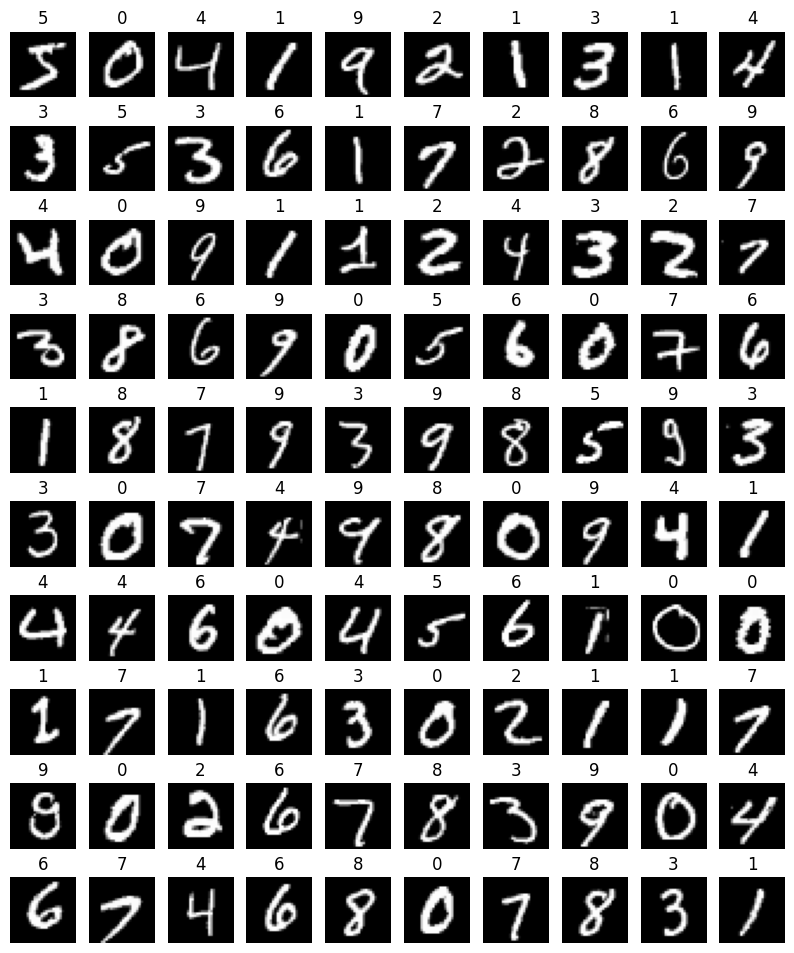

In [3]:
# plot the first 10 images with their labels
plt.figure(figsize=(10, 12))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

#### Model training

In [4]:
# Split the data into train/test sets
TRAIN_SIZE = 50000
X_train, X_test = X[:TRAIN_SIZE], X[TRAIN_SIZE:]
y_train, y_test = y[:TRAIN_SIZE], y[TRAIN_SIZE:]

classifier = MLPClassifier(
    hidden_layer_sizes=(50, 20, 10),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier.fit(X_train, y_train)


Iteration 1, loss = 0.47772268
Iteration 2, loss = 0.16435982
Iteration 3, loss = 0.12618247
Iteration 4, loss = 0.10649038
Iteration 5, loss = 0.09039465
Iteration 6, loss = 0.07945557
Iteration 7, loss = 0.07424755
Iteration 8, loss = 0.06643571
Iteration 9, loss = 0.05982603
Iteration 10, loss = 0.05655218
Iteration 11, loss = 0.04981067
Iteration 12, loss = 0.05127314
Iteration 13, loss = 0.04650352
Iteration 14, loss = 0.04558377
Iteration 15, loss = 0.04044781
Iteration 16, loss = 0.03830433
Iteration 17, loss = 0.03335348
Iteration 18, loss = 0.03522754
Iteration 19, loss = 0.03186215
Iteration 20, loss = 0.02899062
Iteration 21, loss = 0.03441919
Iteration 22, loss = 0.02783708
Iteration 23, loss = 0.03032931
Iteration 24, loss = 0.02597921
Iteration 25, loss = 0.02503296
Iteration 26, loss = 0.03120632
Iteration 27, loss = 0.02786305
Iteration 28, loss = 0.02243469
Iteration 29, loss = 0.02329687
Iteration 30, loss = 0.01931279
Iteration 31, loss = 0.01916672
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=10)

#### Model evaluation

In [5]:
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))


Training set score: 0.996200
Test set score: 0.970800


#### Visualizing the Cost Function evolution

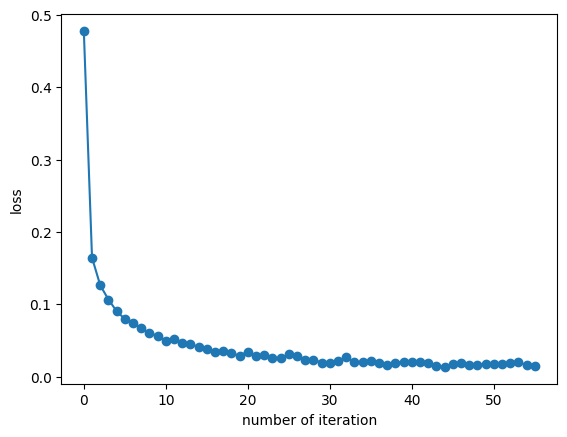

In [6]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()


#### Visualizing the learnt weights

In [7]:
len(classifier.intercepts_) == len(classifier.coefs_) == 4


True

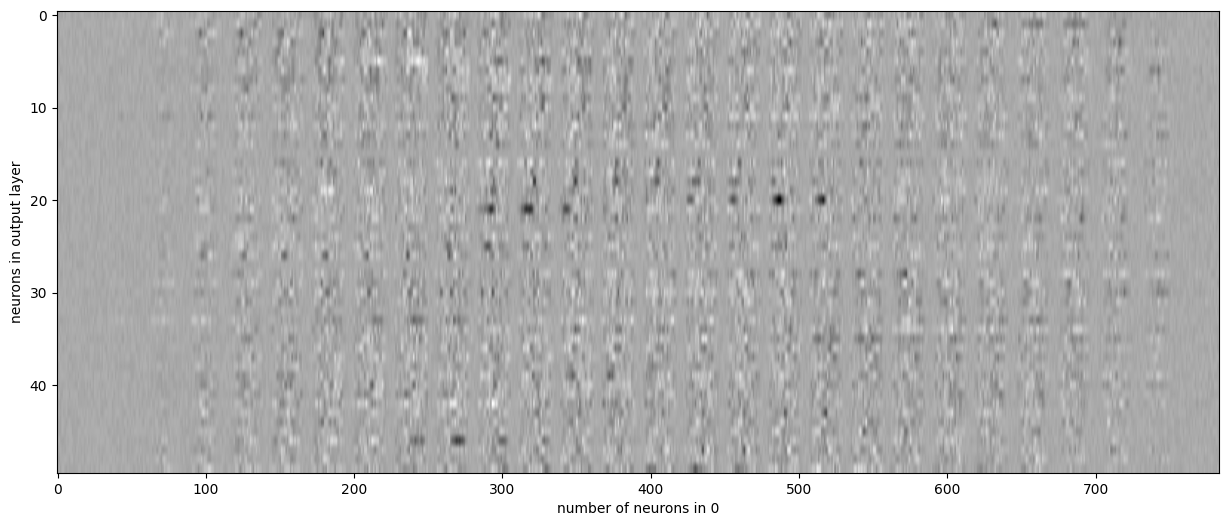

In [8]:
# Visualizing the learnt weights of the input layer
target_layer = 0  # 0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.imshow(np.transpose(classifier.coefs_[
            target_layer]), cmap=plt.get_cmap("gray"), aspect="auto")
axes.set_xlabel(f"number of neurons in {target_layer}")
axes.set_ylabel("neurons in output layer")
plt.show()


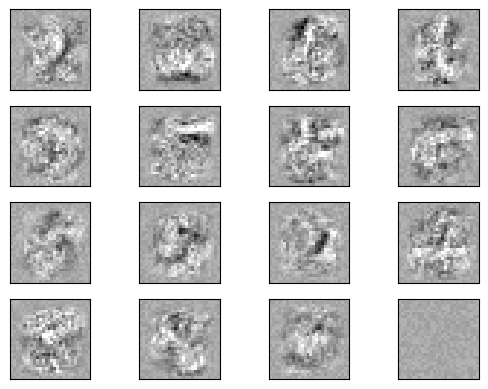

In [9]:
# choose layer to plot
target_layer = 0  # 0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(4, 4)
vmin, vmax = classifier.coefs_[0].min(), classifier.coefs_[target_layer].max()
for coef, ax in zip(classifier.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray,
               vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()


Accuracy: 97.08 %


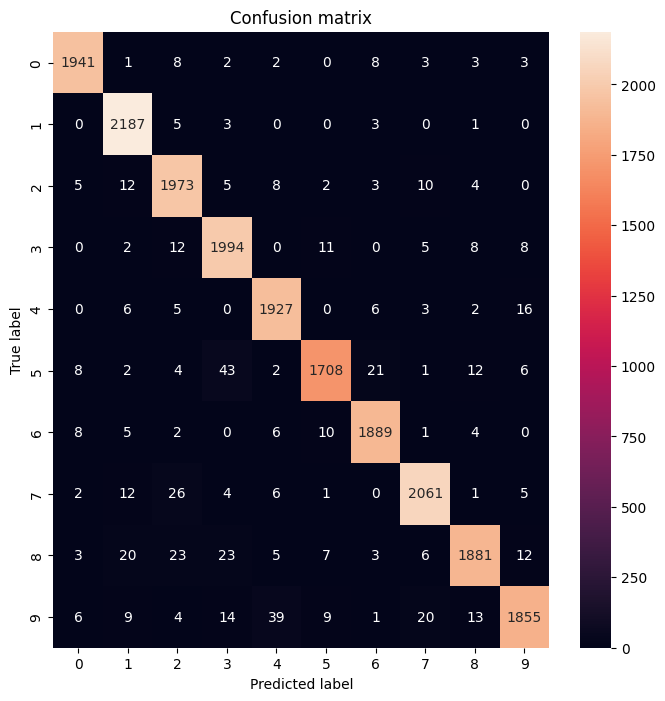

In [10]:
# Report your accuracy and print out the confusion matrix.
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

# accuracy
print(f"Accuracy: {100 * np.sum(y_pred == y_test) / len(y_test)} %")

# Plot the confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

> 10 points. 0.5 hours.

# MLPClassifier for *Normalized* MNIST data
Repeat problem `#3`, but also <u>normalize</u> the input data by dividing by variance on the scaled 0-1 data by using `sklearn`’s `StandardScaler`. 
- Report your accuracy and see if it improves from problem #3.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# normalize the input data by dividing by variance on the scaled 0-1 data by using sklearn’s StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into train/test sets
X_normalized_train, X_normalized_test = X_normalized[:TRAIN_SIZE], X_normalized[TRAIN_SIZE:]

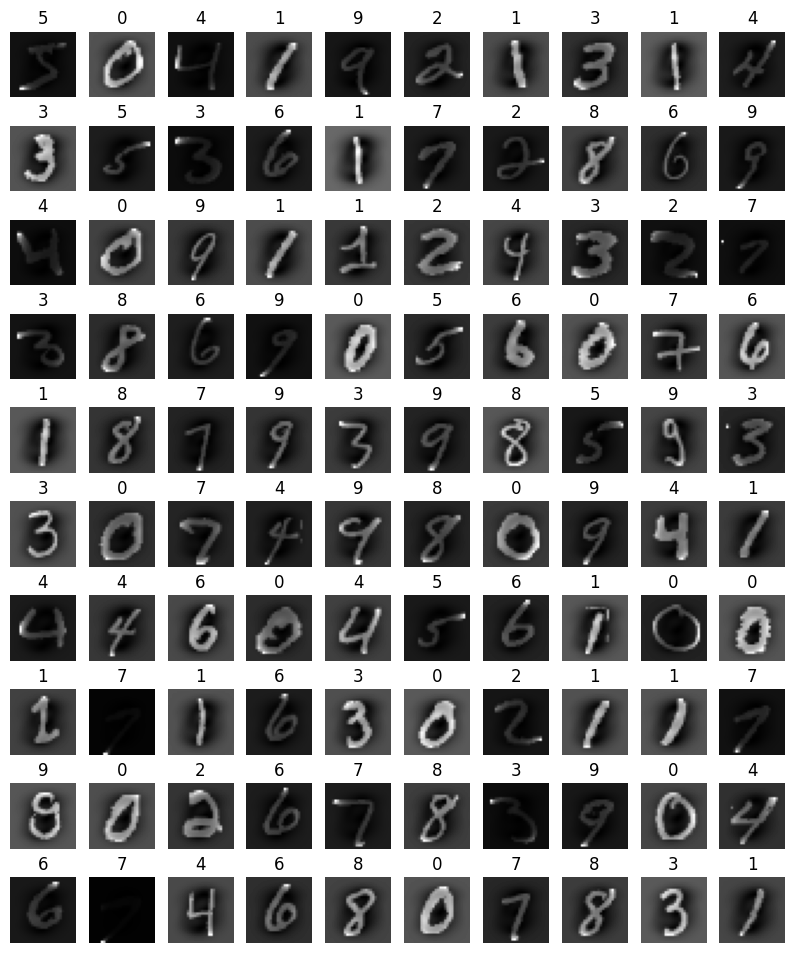

In [13]:
# plot the first 10 images with their labels
plt.figure(figsize=(10, 12))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_normalized[i].reshape(28, 28), cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

In [14]:
X_normalized_train, X_normalized_test = X_normalized[:TRAIN_SIZE], X_normalized[TRAIN_SIZE:]

classifier_normalized = MLPClassifier(
    hidden_layer_sizes=(50, 20, 10),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier_normalized.fit(X_normalized_train, y_train)


Iteration 1, loss = 0.46315045
Iteration 2, loss = 0.23566934
Iteration 3, loss = 0.17378416
Iteration 4, loss = 0.14117685
Iteration 5, loss = 0.13707731
Iteration 6, loss = 0.11476736
Iteration 7, loss = 0.11574951
Iteration 8, loss = 0.11798205
Iteration 9, loss = 0.09533255
Iteration 10, loss = 0.09516055
Iteration 11, loss = 0.08894158
Iteration 12, loss = 0.09259169
Iteration 13, loss = 0.07938530
Iteration 14, loss = 0.08644967
Iteration 15, loss = 0.23914056
Iteration 16, loss = 0.44597470
Iteration 17, loss = 0.41417064
Iteration 18, loss = 0.38680322
Iteration 19, loss = 0.46140572
Iteration 20, loss = 1.49511483
Iteration 21, loss = 1.64028571
Iteration 22, loss = 1.93275196
Iteration 23, loss = 1.94419988
Iteration 24, loss = 1.93462836
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=10)

In [15]:
print("Training set score: %f" % classifier_normalized.score(X_normalized_train, y_train))
print("Test set score: %f" % classifier_normalized.score(X_normalized_test, y_test))

Training set score: 0.192540
Test set score: 0.191300


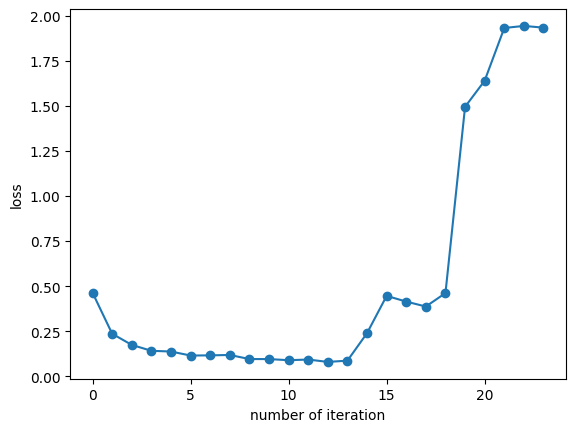

In [16]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier_normalized.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

In [17]:
len(classifier_normalized.intercepts_) == len(classifier_normalized.coefs_) == 4


True

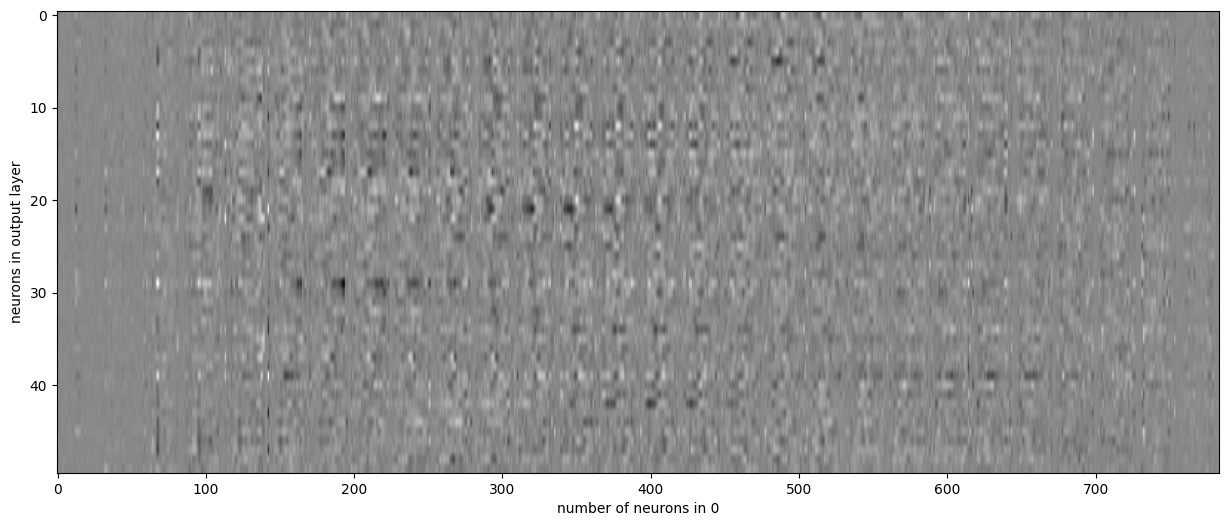

In [18]:
# Visualizing the learnt weights of the input layer
target_layer = 0  # 0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.imshow(np.transpose(classifier_normalized.coefs_[
            target_layer]), cmap=plt.get_cmap("gray"), aspect="auto")
axes.set_xlabel(f"number of neurons in {target_layer}")
axes.set_ylabel("neurons in output layer")
plt.show()


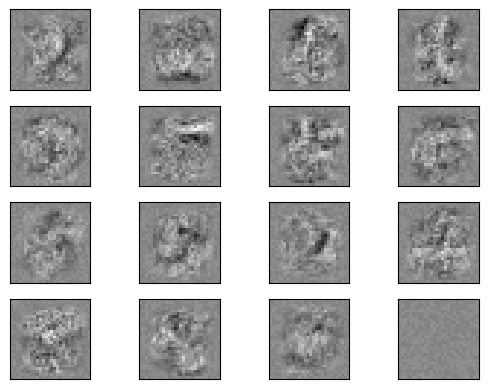

In [19]:
# choose layer to plot
target_layer = 0  # 0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(4, 4)
vmin, vmax = classifier_normalized.coefs_[0].min(), classifier_normalized.coefs_[target_layer].max()
for coef, ax in zip(classifier.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray,
               vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()


Accuracy: 19.13 %


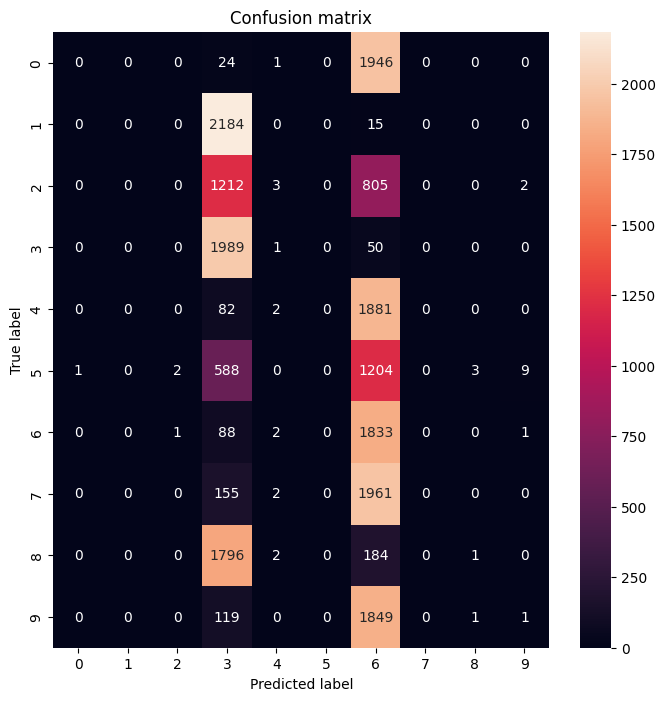

In [20]:
y_normalized_pred = classifier_normalized.predict(X_normalized_test)
confusion_matrix(y_test, y_normalized_pred)

# accuracy
print(f"Accuracy: {100 * np.sum(y_normalized_pred == y_test) / len(y_test)} %")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_normalized_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [21]:
# Compare the performance of the two models
print(f"Accuracy of the model with normalized data: {100 * np.sum(y_normalized_pred == y_test) / len(y_test)} %")
print(f"Accuracy of the model with non-normalized data: {100 * np.sum(y_pred == y_test) / len(y_test)} %")

Accuracy of the model with normalized data: 19.13 %
Accuracy of the model with non-normalized data: 97.08 %
